In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import ipywidgets

In [5]:
@ipywidgets.interact(name = ['Linda', 'Tina', 'Louise'])
def print_name(name):
    print(name)

interactive(children=(Dropdown(description='name', options=('Linda', 'Tina', 'Louise'), value='Linda'), Output…

In [6]:
# store a widget in a variable
itext = ipywidgets.IntText()
itext

IntText(value=0)

In [9]:
itext.value = 20

In [12]:
# progress bar
ip = ipywidgets.IntProgress(value=20)
ip

IntProgress(value=20)

In [13]:
irange = ipywidgets.IntSlider(min = 0, max =100, step=1)
irange

IntSlider(value=0)

In [14]:
ip.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'bar_style',
 'description',
 'description_tooltip',
 'layout',
 'max',
 'min',
 'orientation',
 'style',
 'value']

In [15]:
irange.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'continuous_update',
 'description',
 'description_tooltip',
 'disabled',
 'layout',
 'max',
 'min',
 'orientation',
 'readout',
 'readout_format',
 'step',
 'style',
 'value']

In [17]:
ipywidgets.jslink( (ip, 'value'), (irange, 'value') )

Link(source=(IntProgress(value=20), 'value'), target=(IntSlider(value=72), 'value'))

In [18]:
ip

IntProgress(value=20)

In [19]:
irange

IntSlider(value=20)

In [20]:
ipywidgets.VBox([ip, irange])

In [21]:
# using "link" instead of "jslink"
ip2 = ipywidgets.IntProgress()
irange2 = ipywidgets.IntSlider(min=0, max=100, step=1)
ipywidgets.link( (ip2, 'value'), (irange2, 'value') )
ipywidgets.VBox([ip2, irange2])

In [22]:
button = ipywidgets.Button(description="I am a button")
button

Button(description='I am a button', style=ButtonStyle())

I have clicked.  Click.
I have clicked.  Click.
I have clicked.  Click.


In [23]:
def say_click(event):
    print("I have clicked.  Click.")

In [24]:
button.on_click(say_click)

In [34]:
# let's build a mini-interface
ip = ipywidgets.IntProgress()
ip

IntProgress(value=0)

In [35]:
button_plus = ipywidgets.Button(description="+10")
button_plus

Button(description='+10', style=ButtonStyle())

In [36]:
button_minus = ipywidgets.Button(description="-10")
button_minus

Button(description='-10', style=ButtonStyle())

In [37]:
ipywidgets.HBox([button_minus, ip, button_plus])

In [38]:
def click_down(event):
    ip.value -= 10

In [39]:
button_minus.on_click(click_down)

In [40]:
def click_up(event):
    ip.value += 10
    #print(event)
button_plus.on_click(click_up)

One more: color picker slider:

In [41]:
islider = ipywidgets.IntSlider(min = 0, max=10, step=1, orientation = 'vertical')
islider

IntSlider(value=0, max=10, orientation='vertical')

In [45]:
islider.style.handle_color = '#750075'

In [46]:
cp = ipywidgets.ColorPicker()
cp

ColorPicker(value='black')

In [47]:
ipywidgets.link( (cp, 'value'), (islider.style, 'handle_color') )

In [48]:
ipywidgets.VBox([cp, islider])

Let's talk a bit about traitlets:

In [49]:
# let's make a "normal" class
class MyObject():
    name = 'unnamed'
    age = 0

In [50]:
my_obj = MyObject() # my_obj variable is an instance of MyObject class

In [51]:
my_obj.name, my_obj.age

('unnamed', 0)

In [52]:
my_obj.name = 'Bob'; my_obj.age = 47

In [53]:
my_obj.name, my_obj.age

('Bob', 47)

In [55]:
print('Hello my name is', my_obj.name, 'and I am', my_obj.age, 'years old')

Hello my name is Bob and I am 47 years old


Now let's use traitlets to look for changes:

In [67]:
import traitlets

class MyTraitletObject(traitlets.HasTraits):
    name = traitlets.Unicode('unnamed')
    age = traitlets.Int(0)

In [68]:
my_t_obj = MyTraitletObject()
my_t_obj.age = 47
my_t_obj.name = 'Bob'

In [69]:
print('Hello my name is', my_t_obj.name, 'and I am', my_t_obj.age, 'years old')

Hello my name is Bob and I am 47 years old


In [70]:
def name_change(change):
    #print(change)
    print('Hello my name is', change['new'], 'and I am', change['owner'].age, 'years old')
    
my_t_obj.observe(name_change, ['name'])

In [72]:
my_t_obj.name = 'Linda'

Hello my name is Linda and I am 47 years old


In [73]:
my_t_obj.name = 'Tina'

Hello my name is Tina and I am 47 years old


In [74]:
def age_changed(change):
    print('Hello my name is', change['owner'].name, 'and I am', change['new'], 'year old')

In [75]:
my_t_obj.observe(age_changed, ['age'])

In [76]:
my_t_obj.age = 14

Hello my name is Tina and I am 14 yeard old


In [77]:
mich_filename = '/Users/jillnaiman/Downloads/michigan_lld.flt'
michigan = np.fromfile(mich_filename, dtype='f4').reshape((5365,4201))

In [78]:
michigan.min()

-9999.0

In [79]:
michigan[michigan==-9999] = np.nan

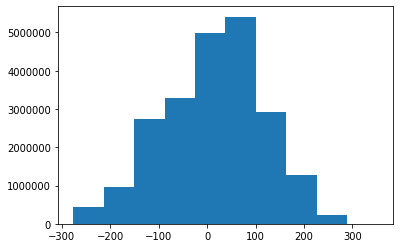

In [80]:
plt.hist(michigan[~np.isnan(michigan)])
plt.show()

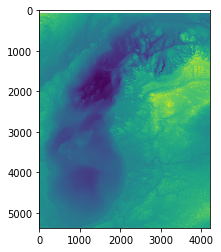

In [81]:
plt.imshow(michigan)
plt.show()

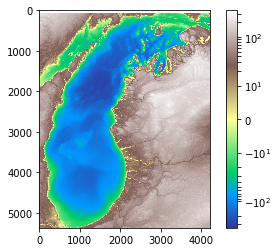

In [82]:
import matplotlib.colors as mpl_colors

plt.imshow(michigan, cmap='terrain', norm=mpl_colors.SymLogNorm(10)) # symmetric log color map
plt.clim(-352, 352) # symmteric colormap in + and -
plt.colorbar()
plt.show()

In [83]:
mpl_colors.SymLogNorm?

In [134]:
@ipywidgets.interact(colormap = plt.colormaps(), sym_log = True, figy=[5,10])
def plot(colormap='terrain', sym_log=True, figy=5):
    if sym_log: # if we have our toggle set to True
        norm = mpl_colors.SymLogNorm(10)
    else: # if toggle is off, don't use the log norm function to normalize colormap
        norm = mpl_colors.Normalize() # default matplotlib normalization
        
    fig, ax = plt.subplots(figsize=(4,figy))
    CAX = ax.imshow(michigan, cmap=colormap, norm=norm) # saving the image in a way for colorbar
    plt.colorbar(CAX) # using our image to make the colorbar
    plt.show()

interactive(children=(Dropdown(description='colormap', index=154, options=('Accent', 'Accent_r', 'Blues', 'Blu…

# For the HW: UFO dataset

In [86]:
import pandas as pd

In [89]:
ufos = pd.read_csv("/Users/jillnaiman/Downloads/ufo-scrubbed-geocoded-time-standardized-00.csv",
                  names=['date', 'city', 'state', 'country', 
                       'shape', 'duration_seconds', 'duration', 
                       'comment', 'report_date', 'latitude', 'longitude'],
                  parse_dates=['date', 'report_date'])



In [90]:
ufos

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.165833,-86.784444
80328,2013-09-09 22:00:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.613611,-116.202500
80329,2013-09-09 22:00:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,2013-09-30,38.297222,-122.284444
80330,2013-09-09 22:20:00,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.901111,-77.265556


In [91]:
# process the data to turn it into strings from NaN's that are numbers
ufos = ufos.fillna({'country':'unknown', 'state':'unknown', 'shape':'unknown'})

In [92]:
ufos

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,unknown,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),unknown,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.165833,-86.784444
80328,2013-09-09 22:00:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.613611,-116.202500
80329,2013-09-09 22:00:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,2013-09-30,38.297222,-122.284444
80330,2013-09-09 22:20:00,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.901111,-77.265556


Your data is big! Let's try subsetting!

In [99]:
np.random.seed(seed=42)

In [114]:
np.random.seed(seed=42)
nsamples = 1000
downSampleMask = np.random.choice(range(len(ufos)-1), nsamples, replace=False)
downSampleMask

array([51411, 25771, 64176,  2623, 59591, 14858,  5579, 77777, 13534,
        8344, 27261,  6293, 41677, 38171, 25199, 22675, 16869, 62577,
       56122, 18425, 65770, 33008, 53398, 36084, 62675, 31486, 40384,
       44459, 76116,  2114, 36699, 77980, 67899, 77969, 31563,  1457,
       76826, 42899, 71740,  9735, 65271, 56013, 75988, 24294, 76611,
       54949, 11482, 51424,  3085, 78133, 69990, 16405, 78805, 20101,
       16050, 51627, 24167, 46038, 31820, 44224, 44015, 40366, 37168,
       65482, 67862, 51271, 60130, 13888, 32942, 17599, 17095, 49184,
       78508,  5567, 68305, 60193, 68408, 77484, 10351, 78266, 44201,
       23737, 38443, 14564, 73706, 38641, 48962, 24808, 58553, 39135,
         323, 33868, 12662, 24620, 69389, 67958, 54397, 19858,  7225,
       15766, 20658, 16002, 76268, 16084, 16137, 37183, 43450, 29335,
       64488, 17535, 23400, 76171, 55027, 21681, 53781, 45304, 47462,
       20536, 61111, 34009, 11668, 60425, 38055, 41374, 77803, 77516,
        6095, 39076,

In [112]:
ufosDS = ufos.loc[downSampleMask]

In [104]:
ufosDS

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
25249,2007-01-08 17:30:00,las vegas,nv,us,light,3600.0,1 hour +,Red light stayed in sky for over 1 hour,2007-04-27,36.175000,-115.136389
19040,2013-12-19 20:00:00,salt lake city,ut,us,flash,1.0,1 second,Bright green flashes. ((NUFORC Note: Possibl...,2013-12-23,40.760833,-111.890278
68639,2008-08-02 22:45:00,ocean city,nj,us,circle,3.0,3 seconds,Round object flying from south extremely quick...,2008-08-12,39.277500,-74.575000
40785,2014-04-07 20:00:00,daytona beach,fl,us,rectangle,30.0,.5 minutes,Rounded Rectangular wings&#44 no visible body&...,2014-04-11,29.210556,-81.023056
51902,2004-06-26 03:00:00,bolivar,mo,us,light,60.0,1 minute,MISSOURI INVESTIGATORS GROUP Report: Starlike...,2004-07-08,37.614444,-93.410278
...,...,...,...,...,...,...,...,...,...,...,...
78358,2013-09-28 22:25:00,osprey,fl,us,chevron,30.0,30 seconds,Observed a cloud like semi transparent Vee sha...,2013-09-30,27.195833,-82.490556
7010,1999-10-08 21:00:00,munds park,az,us,cone,2400.0,40+ min,cone shaped mist with single white light at to...,2006-10-30,34.945556,-111.639444
12465,2013-11-22 19:00:00,west sumatra (indonesia),unknown,unknown,oval,3600.0,1 hour,Oval shape craft with lights around attached t...,2013-12-02,-0.589724,101.343106
19046,1950-01-02 00:00:00,new york city,ny,us,oval,900.0,15min,good and true info. 500 Lights On Object0: Yes,2007-04-27,40.714167,-74.006389


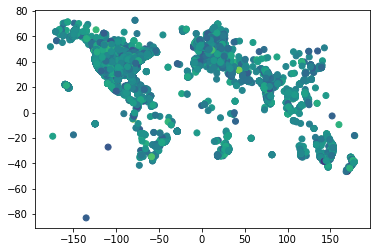

In [108]:
# original
plt.scatter(ufos['longitude'], ufos['latitude'], c=np.log10(ufos['duration_seconds']))
plt.show()

In [106]:
ufos['duration_seconds'].min(), ufos['duration_seconds'].max()

(0.001, 97836000.0)

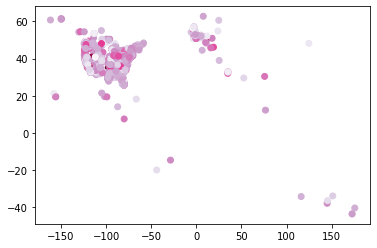

In [128]:
# downsampled
plt.scatter(ufosDS['longitude'], ufosDS['latitude'], 
            c=np.log10(ufosDS['duration_seconds']), 
           cmap='PuRd')
plt.show()

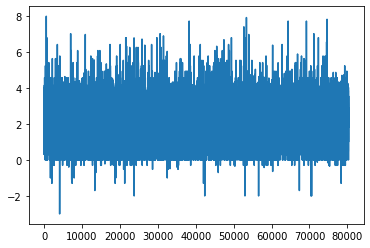

In [116]:
plt.plot(np.log10(ufos['duration_seconds']))

In [120]:
if ufos['duration_seconds'].dtype == 'float64':
    print('I am numerical')

I am numerical


In [122]:
ufos.columns

Index(['date', 'city', 'state', 'country', 'shape', 'duration_seconds',
       'duration', 'comment', 'report_date', 'latitude', 'longitude'],
      dtype='object')

In [124]:
if ufos['shape'].dtype == 'O':
    print('I am not numerical')

I am not numerical


<BarContainer object of 29 artists>

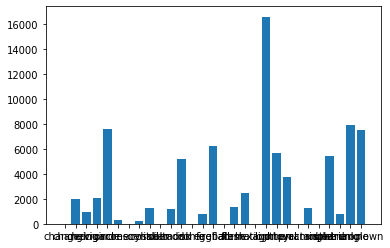

In [131]:
# hint
bin_by = 'shape'
myseries = ufos.groupby(bin_by)[bin_by].count()
x = myseries.index
y = myseries.values
plt.bar(x, y)
